# Create the Simple Super bot

- Uses LLM

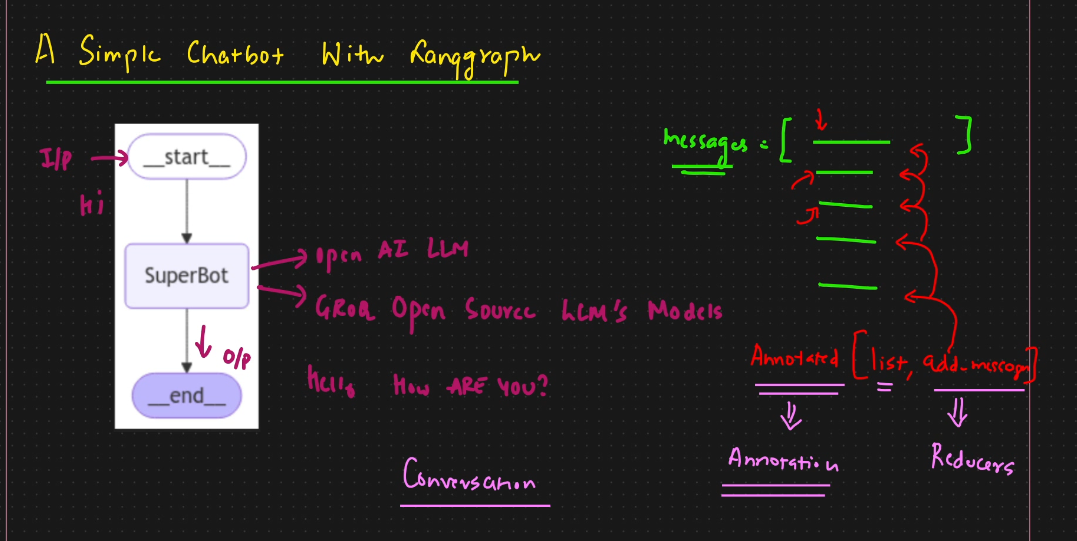

In [2]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [3]:
# The add_messages in the state will track all of the
# messages in conversation with the chatbot
# It creates a list with the messages appended
# The add_messages is also called a reducer

class State(TypedDict):
    messages:Annotated[list, add_messages]
    

In [4]:
# Load the environment variables
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPEN_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [ ]:
# Here we use a paid model from openai
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_df0f7b956c', 'id': 'chatcmpl-C8x6fAjfZTw57Ws2mPGGpqZdZBVCW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--8d805c8f-f7d2-46d4-9b1a-3787121b091e-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
# Here we use groq with opensource models
from langchain_groq import ChatGroq

llm_groq = ChatGroq(model="llama-3.1-8b-instant")
llm_groq.invoke("Hey I am Jonathan and I like to play baseball")

AIMessage(content="Nice to meet you, Jonathan. That's great that you enjoy playing baseball. What position do you play, and how long have you been playing? Are you part of a school team, a local league, or just play for fun with friends?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 45, 'total_tokens': 96, 'completion_time': 0.069996717, 'prompt_time': 0.007084141, 'queue_time': 0.194446004, 'total_time': 0.077080858}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--941238fe-2bee-4973-925b-eeaad2e70aef-0', usage_metadata={'input_tokens': 45, 'output_tokens': 51, 'total_tokens': 96})

## Create Nodes

In [14]:
# Create define the bot
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

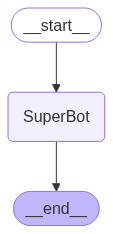

In [16]:
# Create graph
graph = StateGraph(State)

# Nodes
graph.add_node("SuperBot", superbot)

# Edges
graph.add_edge(START, "SuperBot")
graph.add_edge("SuperBot", END)

# compile
graph_builder = graph.compile()

# Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [18]:
# Invocation - Here we just invoke
graph_builder.invoke({'messages':'Hi, my name is Jonathan and I like baseball'})

{'messages': [HumanMessage(content='Hi, my name is Jonathan and I like baseball', additional_kwargs={}, response_metadata={}, id='8600ed56-f696-404c-8604-29b2d3ce5cbf'),
  AIMessage(content='Hi Jonathan, nice to meet you. Baseball is a classic American sport with a rich history and a loyal fan base. Which team is your favorite? Are you a fan of the Yankees, Red Sox, Dodgers, or perhaps a smaller market team like the Cubs or Nationals?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 56, 'prompt_tokens': 45, 'total_tokens': 101, 'completion_time': 0.082673877, 'prompt_time': 0.006301173, 'queue_time': 0.194996897, 'total_time': 0.08897505}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_55d70a61e4', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--841828d2-3ef4-4e40-b69b-2f2c4f1f8e7d-0', usage_metadata={'input_tokens': 45, 'output_tokens': 56, 'total_tokens': 101})]}

In [20]:
# We can also stream
# We need to set stream_mode to 'values' to capture all values
for event in graph_builder.stream({'messages':'Hello my name is Jonathan'}, stream_mode='values'):
    print(event)

{'messages': [HumanMessage(content='Hello my name is Jonathan', additional_kwargs={}, response_metadata={}, id='49135170-f2d5-4eff-92f0-ba4a3d907e47')]}
{'messages': [HumanMessage(content='Hello my name is Jonathan', additional_kwargs={}, response_metadata={}, id='49135170-f2d5-4eff-92f0-ba4a3d907e47'), AIMessage(content="Hello Jonathan, it's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 40, 'total_tokens': 66, 'completion_time': 0.022260454, 'prompt_time': 0.006065458, 'queue_time': 0.194562767, 'total_time': 0.028325912}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_46fc01befd', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--fc08edb5-4a2e-4fae-bdb0-dff938723c3a-0', usage_metadata={'input_tokens': 40, 'output_tokens': 26, 'total_tokens': 66})]}
